In [15]:
from PC import PC
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [16]:
def getEdges(dictGraph):
    edges = []
    for node1, addjacents in dictGraph.items():
        for node2 in addjacents:
            edges.append((node1, node2))
    return edges

In [17]:
data = pd.read_csv('data/train.csv')
data.drop(columns=['Name', 'Ticket', 'Cabin', 'Embarked'], inplace=True)

data['Sex'] = data['Sex'].apply(lambda x: 1 if x=='male' else 0)

In [18]:
pc = PC(0.0001)

graph, separatingSets = pc.causalDiscovery(data)

Depth 0 completed
Depth 1 completed
Depth 2 completed
Depth 3 completed
Depth 4 completed


In [19]:
print('Number of disconnections:', len(separatingSets))
for separatingSet in separatingSets:
    print(separatingSet[0], 'are sepated by', separatingSet[1])

Number of disconnections: 15
('Survived', 'Pclass') are sepated by {}
('PassengerId', 'Survived') are sepated by ('Fare',)
('PassengerId', 'Pclass') are sepated by ('Fare',)
('PassengerId', 'Sex') are sepated by ('Fare',)
('PassengerId', 'Age') are sepated by ('Fare',)
('PassengerId', 'SibSp') are sepated by ('Fare',)
('PassengerId', 'Parch') are sepated by ('Fare',)
('PassengerId', 'Fare') are sepated by ('Fare',)
('Survived', 'Sex') are sepated by ('Age',)
('Pclass', 'Sex') are sepated by ('Age',)
('Pclass', 'Age') are sepated by ('SibSp',)
('Age', 'SibSp') are sepated by ('Fare',)
('Age', 'Parch') are sepated by ('Survived',)
('Age', 'Fare') are sepated by ('Survived',)
('Sex', 'Parch') are sepated by ('Fare', 'Age')


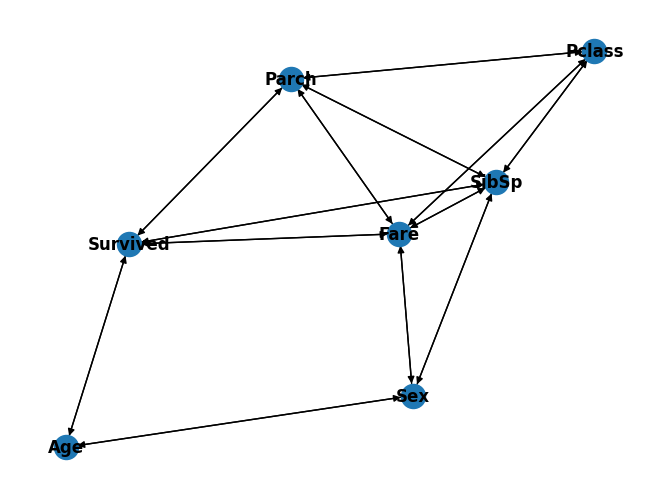

In [20]:
G = nx.DiGraph(getEdges(graph))
nx.draw(G, with_labels=True, font_weight='bold')
plt.show()

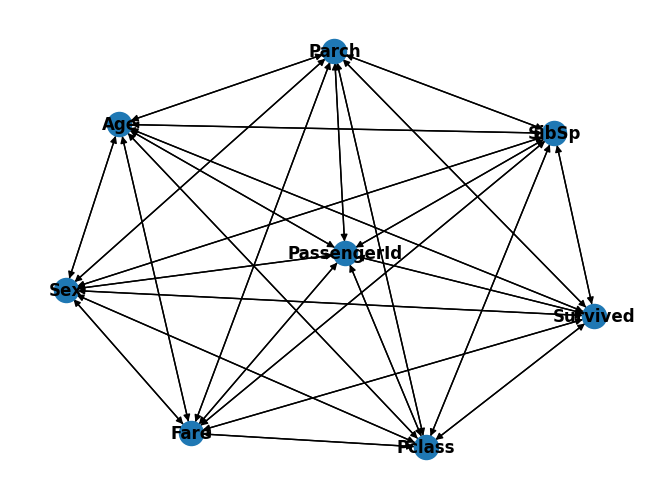

In [21]:
originalGraph = {column: set(data.columns.drop(column)) \
                            for column in data.columns}

G = nx.DiGraph(getEdges(originalGraph))
nx.draw(G, with_labels=True, font_weight='bold')
plt.show()